<a href="https://colab.research.google.com/github/malakkkk4/keras/blob/main/S2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting Up the Development Environment

**1. Installing necessary libraries**

In [ ]:
#!pip install tensorflow
#!pip install numpy pandas matplotlib scikit-learn

In [ ]:
# Verify installations
import tensorflow as tf
print(tf.__version__)

2024-10-10 20:36:54.526887: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.16.1


**2. Importing required modules**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# Simple TensorFlow Operation
a = tf.constant([[1, 2], [3, 4]])
b = tf.constant([[1, 1], [1, 1]])
print(tf.matmul(a, b))

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32)


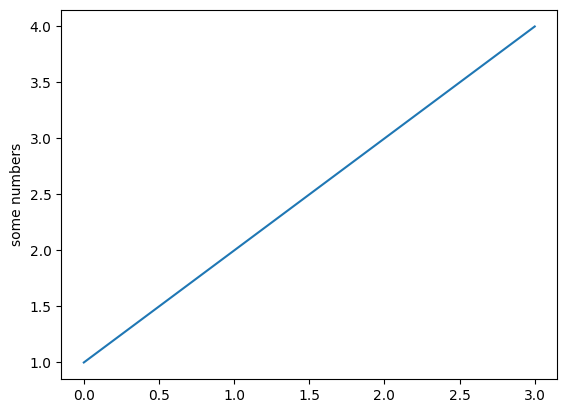

In [ ]:
# Matplotlib Test
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

# Implementing a Simple ANN for Classification

**1. Dataset preparation and preprocessing**

In [ ]:
# Load the dataset
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Convert labels to one-hot encoded format
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

**2. Model architecture design**

In [ ]:
# Define the model structure
model = Sequential([
    Dense(10, activation='relu', input_shape=(4,)),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')
])

/home/aboelwes/miniconda3/envs/NLPForFP/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-10-10 20:44:25.190757: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-10 20:44:25.377862: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-10 20:44:25.377953: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_n

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

**3. Training the model**

In [ ]:
# Fit the model to the training data
history = model.fit(X_train_scaled, y_train_encoded, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100


I0000 00:00:1728582423.259991    5373 service.cc:145] XLA service 0x7f0944009e10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728582423.260260    5373 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti, Compute Capability 7.5
2024-10-10 20:47:03.395072: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-10 20:47:03.924256: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


1/3 ━━━━━━━━━━━━━━━━━━━━ 11s 6s/step - accuracy: 0.1250 - loss: 1.0186

I0000 00:00:1728582426.937057    5373 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 925ms/step - accuracy: 0.3477 - loss: 0.9914 - val_accuracy: 0.9583 - val_loss: 0.8820
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8229 - loss: 0.8431 - val_accuracy: 0.9583 - val_loss: 0.7696
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8516 - loss: 0.7462 - val_accuracy: 0.9583 - val_loss: 0.6569
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8685 - loss: 0.5891 - val_accuracy: 1.0000 - val_loss: 0.5418
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8789 - loss: 0.5098 - val_accuracy: 0.9583 - val_loss: 0.4376
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8581 - loss: 0.4454 - val_accuracy: 0.9583 - val_loss: 0.3603
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8880 - loss: 0.3938 - val_accuracy: 1.0000 - val_loss: 0.3014
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9167 - loss: 0.3311 - val_accuracy: 1.0000 - val_loss: 0.2640
Epo

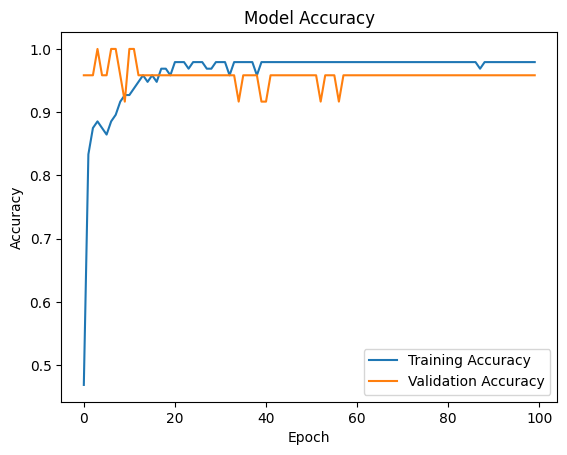

In [ ]:
# Visualize training progress
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**4. Evaluating model performance**

In [ ]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 1.0000


In [ ]:
# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


In [ ]:
# Generate confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
# Calculate and display classification report
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=iris.target_names))

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Building a Single-Layer Network for Linear Regression

**1. Data Preparation for Regression**

In [ ]:
# Generate synthetic data
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
X = np.linspace(-10, 10, 100).reshape(-1, 1)
y = 2 * X + 1 + np.random.randn(100, 1) * 3

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

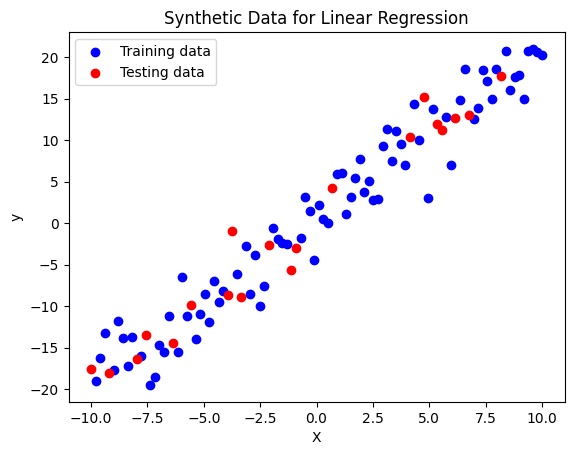

In [ ]:
# Visualize the data
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Testing data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Data for Linear Regression')
plt.legend()
plt.show()

**2. Implementing the Single-Layer Network**

**The model architecture:**
1. Single dense layer with one neuron
2. Linear activation function
3. Mean Squared Error (MSE) as the loss function
4. Adam optimizer for gradient descent

In [ ]:
# Define the model structure
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(1, input_shape=(1,), activation='linear')
])

/home/aboelwes/miniconda3/envs/NLPForFP/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.1), loss='mse')

In [ ]:
# Display model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

**3. Training and Optimizing the Model**

In [ ]:
# Fit the model to the training data
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 266ms/step - loss: 125.1540 - val_loss: 176.3412
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 117.0924 - val_loss: 170.4488
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 113.5396 - val_loss: 164.6101
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 100.5117 - val_loss: 158.9853
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 100.5053 - val_loss: 153.4389
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 105.8355 - val_loss: 147.9905
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 96.8927 - val_loss: 142.7513
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 86.4965 - val_loss: 137.6718
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 92.2045 - val_loss: 132.7535
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 84.8632 - val_loss: 127.9545
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 74.0175 - val_loss: 123.3477
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━

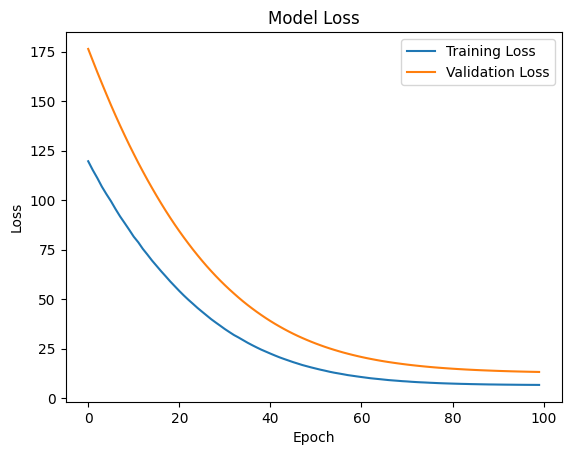

In [ ]:
# Plot the training progress
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")

Test Loss: 5.9226


**4. Visualizing Results**

In [ ]:
# Make predictions on the entire dataset
X_all_scaled = scaler.transform(X)
y_pred = model.predict(X_all_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


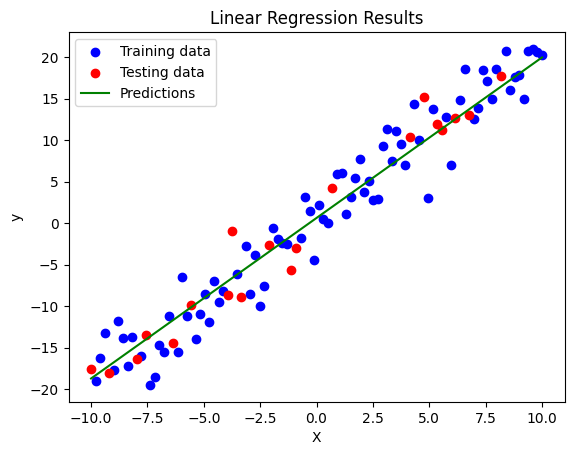

In [ ]:
# Visualize the predictions
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Testing data')
plt.plot(X, y_pred, color='green', label='Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Results')
plt.legend()
plt.show()

In [ ]:
# Extract and print the learned parameters
weight, bias = model.layers[0].get_weights()
print(f"Learned weight: {weight[0][0]:.4f}")
print(f"Learned bias: {bias[0]:.4f}")

Learned weight: 11.2750
Learned bias: 1.1065


In [ ]:
# Compare with the true parameters
print(f"True weight: 2")
print(f"True bias: 1")

True weight: 2
True bias: 1
